In [1]:
from platform import python_version

print(python_version())

3.10.9


dataset from [here](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection) and stored the data locally. Data is also available on github as the storage size on git allows for it. 

Using this dataset as practice as the images are of different dimensions, similar to another project im working on for a business. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # good for separating RGB properties of an image. 
import glob

In [3]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 77B6-1F68

 Directory of C:\Users\Rudol\0_Github\Brain MRI Data\Brain-MRI-Image-Classifier

28/08/2023  09:32 AM    <DIR>          .
28/08/2023  09:32 AM    <DIR>          ..
24/08/2023  04:37 PM    <DIR>          .ipynb_checkpoints
28/08/2023  09:32 AM         1,671,356 Brain_MRI.ipynb
20/07/2023  09:04 PM    <DIR>          dataset
27/08/2023  11:12 PM    <DIR>          logs
               1 File(s)      1,671,356 bytes
               5 Dir(s)  929,049,317,376 bytes free


# Reading a single image

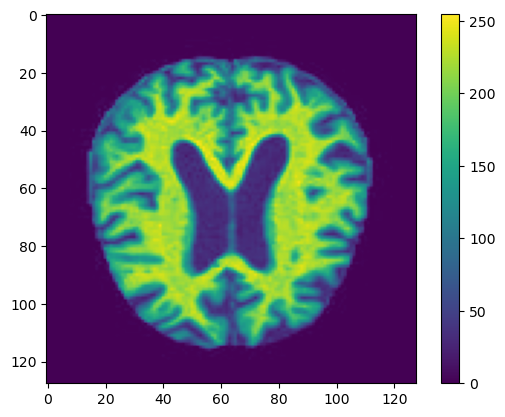

In [5]:
from PIL import Image

image = Image.open('./dataset/Mild_Demented/mild.jpg')
plt.imshow(image)
plt.colorbar()

# Reading multiple images

In [6]:
data_path = './dataset/'
demented_type = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented'] #should leard how to extract this with code


for folder in demented_type:
    file_name = glob.glob(data_path + folder + '*.jpg')
    

In [7]:
data_path = './dataset/'

mild = [] 
very_mild = []
healthy = [] 
moderate = []

for i in glob.glob(data_path + 'Mild_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128)) 
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    mild.append(image)


for i in glob.glob(data_path + 'Very_Mild_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    very_mild.append(image)

for i in glob.glob(data_path + 'Non_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    healthy.append(image)

for i in glob.glob(data_path + 'Moderate_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    moderate.append(image)


In [8]:
len(very_mild)

2240

In [9]:
mild = np.array(mild)
mild.shape # cannot do this with lists. 

(896, 128, 128, 3)

In [10]:
very_mild = np.array(very_mild)

moderate = np.array(moderate)

healthy = np.array(healthy)

In [11]:
all_types = np.concatenate((mild, very_mild, moderate, healthy))

In [12]:
all_types.shape # all images combined into one dimension. the first dimension is the sum of all the demented types

(6400, 128, 128, 3)

# Visualisation

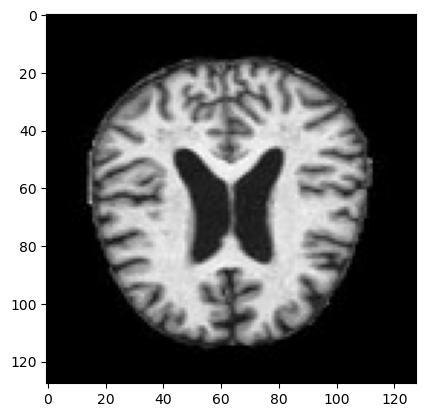

In [13]:
plt.imshow(very_mild[0])

In [14]:
def plot_random(mild, very_mild, moderate, healthy, num= 3):
    mild_images = mild[np.random.choice(mild.shape[0], num, replace = False)]
    very_mild_images = very_mild[np.random.choice(very_mild.shape[0], num, replace = False)]
    moderate_images = moderate[np.random.choice(moderate.shape[0], num, replace = False)]
    healthy_images = healthy[np.random.choice(healthy.shape[0], num, replace = False)]
    
    plt.figure(figsize = (16, 9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('healthy')
        plt.imshow(healthy_images[i])
    
    plt.figure(figsize = (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('very_mild')
        plt.imshow(very_mild[i])
        
    plt.figure(figsize = (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('mild')
        plt.imshow(mild_images[i])
        
    plt.figure(figsize= (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('moderate')
        plt.imshow(moderate_images[i])

Above is not very efficient, can reduce the number of 'for loops', however this is just for demonstration purposes. 

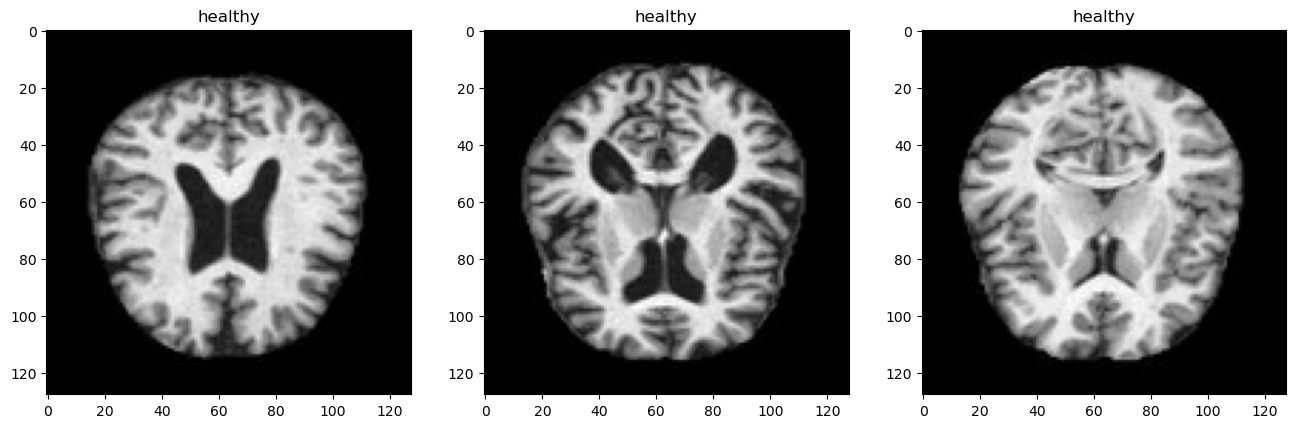

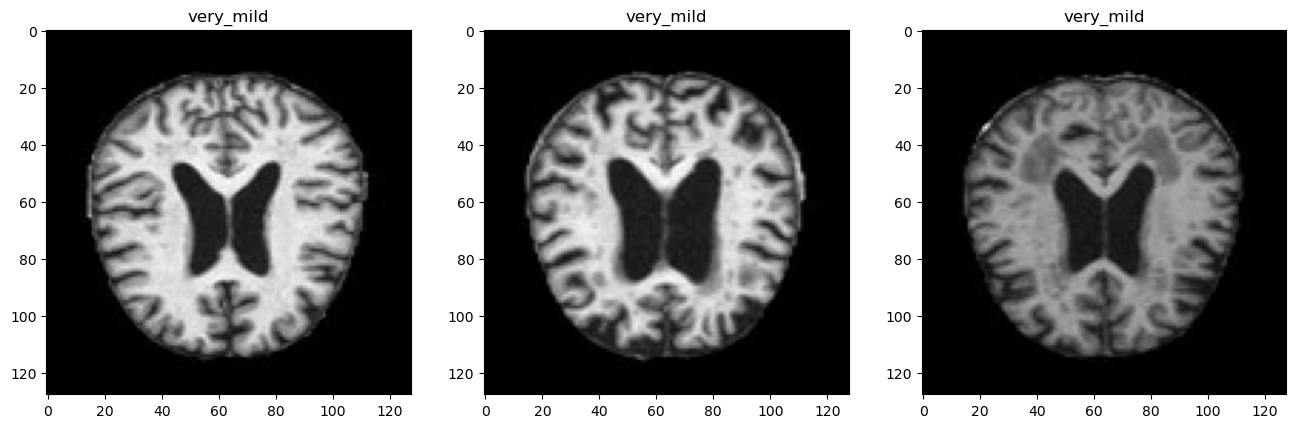

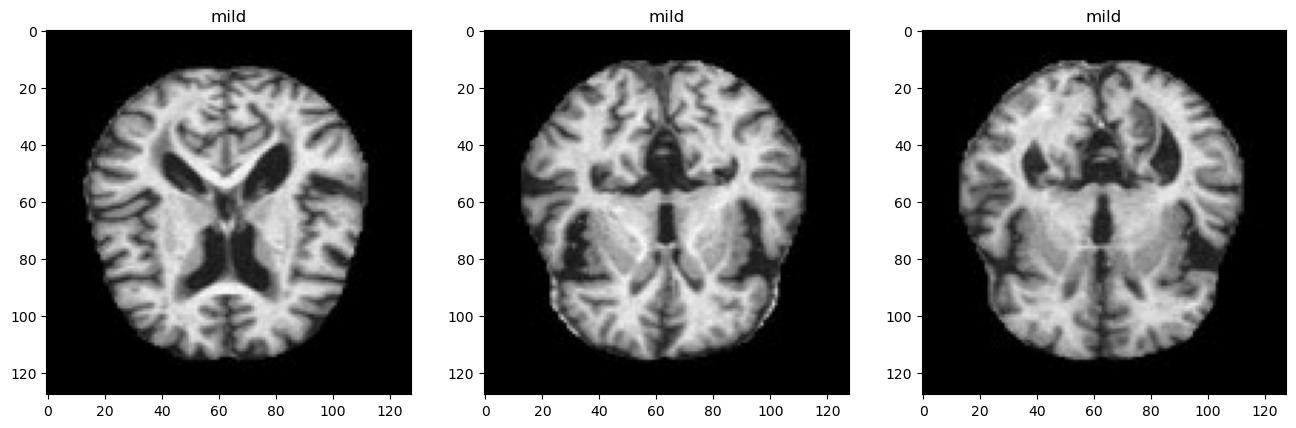

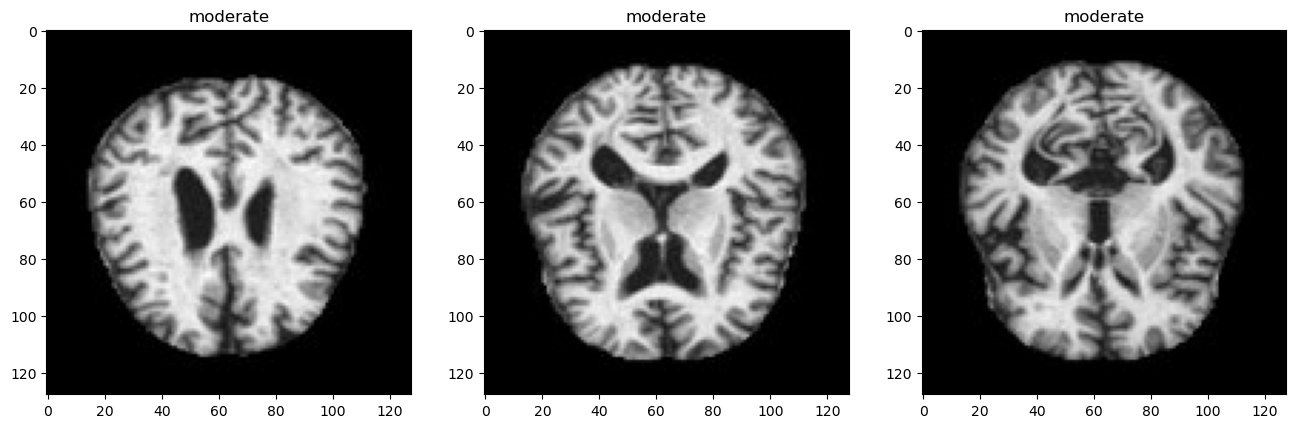

In [15]:
plot_random(mild, very_mild, moderate, healthy)

# Data preparation

## Normalisation

Normalisation is crucial for deep learning. We want to modify the data so that the mean is zero and the standard deviation is one. Therefore ranging between -1 and 1. We do this for including the data in the same range as the activation function for the model. This will allow for less frequent non-zero gradients during training, allowing the neurons in the network to learn faster. Normalising also ensures the channel information can be mixed and updated during the gradient descent (back propagation_ using the same learning rate. 

### Pytorch normalisation

In [16]:
import torch

The images need to be tensors

In [17]:
from torchvision import transforms

C:\Users\Rudol\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Converting from an image to a tensor

In [18]:
mild.shape

(896, 128, 128, 3)

In [19]:
convert_tensor = transforms.ToTensor()
single_mild = convert_tensor(mild[0])

In [20]:
single_mild

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

Checking we can still display the image

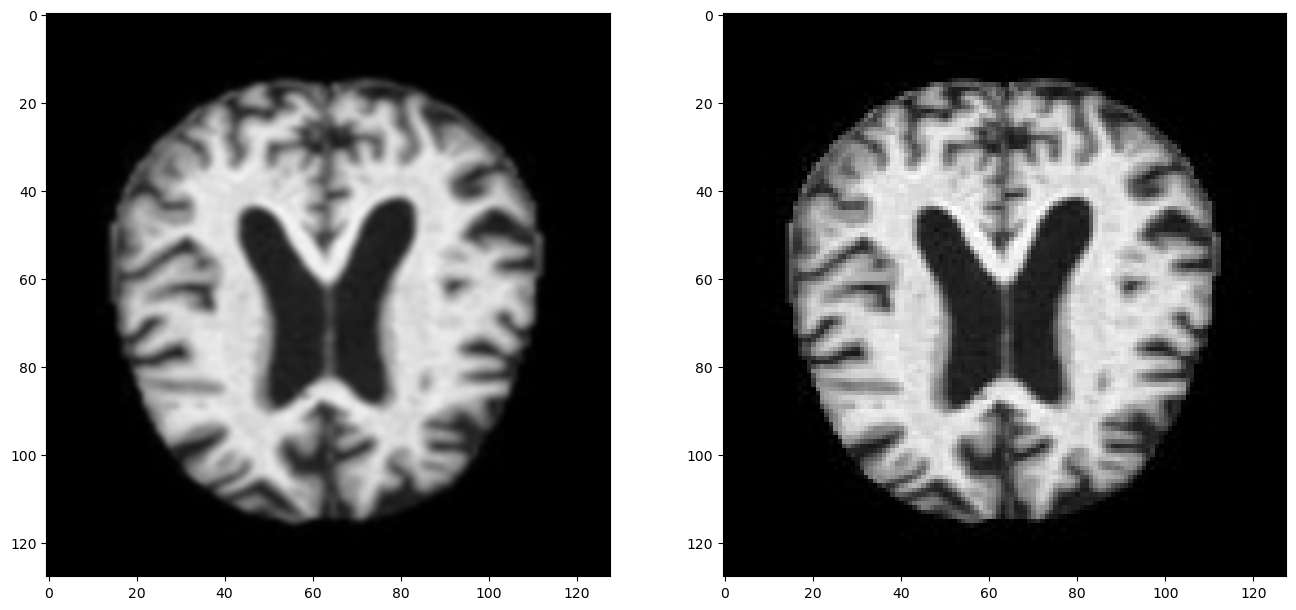

In [21]:
plt.figure(figsize = (16,9))
plt.subplot(121)
plt.imshow(transforms.ToPILImage()(single_mild), interpolation="bicubic")

plt.subplot(122)
plt.imshow(mild[0])

Notice the image that was transformed twice is a little blurry. 

the stack function requires a tuple of tensors, so we can't feed it a single image.

In [22]:
convert_tensor = transforms.ToTensor()

# Using a lambda function

mild_tensors = [convert_tensor(image) for image in mild]
very_mild_tensors = [convert_tensor(image) for image in very_mild]
moderate_tensors = [convert_tensor(image) for image in moderate]
healthy_tensors = [convert_tensor(image) for image in healthy]

As this provides a list of tensors, we can make it a single tensor, which allows for a more efficient model. The model will be able to distinguish between the separate images even if it's a single tensor. 

In [23]:
mild_tensor = torch.stack(mild_tensors)
very_mild_tensor = torch.stack(very_mild_tensors)
moderate_tensor = torch.stack(moderate_tensors)
healthy_tensor = torch.stack(healthy_tensors)

In [24]:
mild_tensor.shape

torch.Size([896, 3, 128, 128])

Getting the mean for each channel (RGB)

In [25]:
mild_tensor.view(3, -1).mean(dim=1)

tensor([0.2635, 0.2634, 0.2578])

In [26]:
mild_tensor.view(3, -1).std(dim = 1)

tensor([0.3152, 0.3111, 0.3162])

We can now use Pytorch's normalisation function from the transform module

In [27]:
norm =  transforms.Normalize(mild_tensor.view(3, -1).mean(dim=1), mild_tensor.view(3, -1).std(dim = 1))
mild_norm = norm(mild_tensor)

norm =  transforms.Normalize(very_mild_tensor.view(3, -1).mean(dim=1), very_mild_tensor.view(3, -1).std(dim = 1))
very_mild_norm = norm(very_mild_tensor)

norm =  transforms.Normalize(moderate_tensor.view(3, -1).mean(dim=1), moderate_tensor.view(3, -1).std(dim = 1))
moderate_norm = norm(moderate_tensor)

norm =  transforms.Normalize(healthy_tensor.view(3, -1).mean(dim=1), healthy_tensor.view(3, -1).std(dim = 1))
healthy_norm = norm(healthy_tensor)

In [28]:
print(mild_norm.mean(), mild_norm.std())

tensor(-3.9122e-05) tensor(1.0002)


We want 0 and 1 however there may have been rounding errors in the data distribution. We don't want to further round the mean and std as this may introduce precision errors in the future.

## Flattening

Flattening is useful for fully connected networks with dense layers. These networks usually expect 1D input while we currently have 3D. 

Convolutional neural networks can work with 3D tensors directly. CNN is designed to process spatial information in the data. 

Depending on the network used, it will advise whether to flatten. Also important to know the difference between reshaping and flattening. 

Good to experiment with different models to gauge performance with flattenned vs unflattened.

In [29]:
mild_flat = [] 

for i, val in enumerate(mild_norm):
    mild_flat.append(mild_norm[i].flatten())
    
very_mild_flat = [] 

for i, val in enumerate(very_mild_norm):
    very_mild_flat.append(very_mild_norm[i].flatten())
    
moderate_flat = [] 

for i, val in enumerate(moderate_norm):
    moderate_flat.append(moderate_norm[i].flatten())
    
healthy_flat = [] 

for i, val in enumerate(healthy_norm):
    healthy_flat.append(healthy_norm[i].flatten())

In [30]:
type(mild_flat)

list

In [31]:
all_flat = []

all_flat = mild_flat + very_mild_flat + moderate_flat + healthy_flat
all_flat = torch.stack(all_flat)

print(all_flat.shape)

torch.Size([6400, 49152])


## 1D vector of labels

In [32]:
def globFn(demented_type: str):
    #stores the file names in a list
    fitsFileNames = glob.glob(data_path + demented_type +'/*.jpg') # Where the asterisk symbol acts as a wildcard
    return fitsFileNames

In [33]:
#creating the labels
mild_filenames = globFn('Mild_Demented')
very_mild_filenames = globFn('Very_Mild_Demented')
moderate_filenames = globFn('Moderate_Demented')
healthy_filenames = globFn('Non_Demented')

#we want to now binarize these labels so that we can use them in our `trainTestSplitFn`
mild_filenames[0:10]

['./dataset/Mild_Demented\\mild.jpg',
 './dataset/Mild_Demented\\mild_10.jpg',
 './dataset/Mild_Demented\\mild_100.jpg',
 './dataset/Mild_Demented\\mild_101.jpg',
 './dataset/Mild_Demented\\mild_102.jpg',
 './dataset/Mild_Demented\\mild_103.jpg',
 './dataset/Mild_Demented\\mild_104.jpg',
 './dataset/Mild_Demented\\mild_105.jpg',
 './dataset/Mild_Demented\\mild_106.jpg',
 './dataset/Mild_Demented\\mild_107.jpg']

In [34]:
len(mild_filenames)

896

In [35]:
demented_type

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

In [36]:
demented_type_dict = {demented_type[0]: 'mild', demented_type[1]: 'moderate_mild', 
                      demented_type[2]: 'healthy', demented_type[3]: 'very_mild'}

In [37]:
all_filenames = np.concatenate((mild_filenames, very_mild_filenames, 
                                moderate_filenames, healthy_filenames))
all_filenames.shape

(6400,)

In [38]:
all_filenames

array(['./dataset/Mild_Demented\\mild.jpg',
       './dataset/Mild_Demented\\mild_10.jpg',
       './dataset/Mild_Demented\\mild_100.jpg', ...,
       './dataset/Non_Demented\\non_997.jpg',
       './dataset/Non_Demented\\non_998.jpg',
       './dataset/Non_Demented\\non_999.jpg'], dtype='<U46')

In [39]:
for i in demented_type_dict:
    print(i)

Mild_Demented
Moderate_Demented
Non_Demented
Very_Mild_Demented


In [40]:
mild_filenames
very_mild_filenames
moderate_filenames
healthy_filenames

['./dataset/Non_Demented\\non.jpg',
 './dataset/Non_Demented\\non_10.jpg',
 './dataset/Non_Demented\\non_100.jpg',
 './dataset/Non_Demented\\non_1000.jpg',
 './dataset/Non_Demented\\non_1001.jpg',
 './dataset/Non_Demented\\non_1002.jpg',
 './dataset/Non_Demented\\non_1003.jpg',
 './dataset/Non_Demented\\non_1004.jpg',
 './dataset/Non_Demented\\non_1005.jpg',
 './dataset/Non_Demented\\non_1006.jpg',
 './dataset/Non_Demented\\non_1007.jpg',
 './dataset/Non_Demented\\non_1008.jpg',
 './dataset/Non_Demented\\non_1009.jpg',
 './dataset/Non_Demented\\non_101.jpg',
 './dataset/Non_Demented\\non_1010.jpg',
 './dataset/Non_Demented\\non_1011.jpg',
 './dataset/Non_Demented\\non_1012.jpg',
 './dataset/Non_Demented\\non_1013.jpg',
 './dataset/Non_Demented\\non_1014.jpg',
 './dataset/Non_Demented\\non_1015.jpg',
 './dataset/Non_Demented\\non_1016.jpg',
 './dataset/Non_Demented\\non_1017.jpg',
 './dataset/Non_Demented\\non_1018.jpg',
 './dataset/Non_Demented\\non_1019.jpg',
 './dataset/Non_Demented\

In [41]:
labels = []

for filename in mild_filenames:
    labels.append(0)

for filename in very_mild_filenames:
    labels.append(1)

for filename in moderate_filenames:
    labels.append(2)

for filename in healthy_filenames:
    labels.append(3)

labels = np.array(labels)
print(labels.shape)

(6400,)


Problem with the above is the loop sees 'Mild_demented twice, thus adding more number of labels. 

Checking that there is 4 labels

In [42]:
np.unique(labels)

array([0, 1, 2, 3])

In [43]:
print(mild_norm.shape)

torch.Size([896, 3, 128, 128])


In [44]:
mild.shape

(896, 128, 128, 3)

In [45]:
from sklearn.model_selection import train_test_split

#splitting the DF with the split function
train_set, test_set, train_labels, test_labels= train_test_split(all_flat, labels, stratify= labels, test_size= 0.3, random_state= 42)

In [46]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer() #sets the function to a variable, less writing.

#converting our labels which contain 0,1,2 into one-hot vector format which is required for the binarizor function
train_labels = lb.fit_transform(train_labels)
test_labels = lb.transform(test_labels) 

print('train_labels shape: ', train_labels.shape, 'and test_labels shape: ', test_labels.shape)

train_labels shape:  (4480, 4) and test_labels shape:  (1920, 4)


In [47]:
test_labels[0:10]

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

# Convolutional Neural Networks

Converting the Pytorch tensors to Tensorflow tensors

## first model attempt

In [48]:
import tensorflow as tf
import numpy as np

# Assuming you have numpy arrays: train_set, train_labels, test_set, test_labels

# Convert NumPy arrays to TensorFlow tensors
train_set_tf = tf.convert_to_tensor(train_set, dtype=tf.float32)
train_labels_tf = tf.convert_to_tensor(train_labels, dtype=tf.float32)
test_set_tf = tf.convert_to_tensor(test_set, dtype=tf.float32)
test_labels_tf = tf.convert_to_tensor(test_labels, dtype=tf.float32)

In [49]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [51]:
import tensorflow as tf
print("GPU available:", tf.config.list_physical_devices())

GPU available: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [52]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=1)

In [56]:
from sklearn.metrics import classification_report
print(tf.__version__)

2.13.0


In [61]:
from sklearn.metrics import classification_report

# Convert EagerTensor to a NumPy array
test_labels_np = test_labels_tf.numpy()

# Print a formatted report
print(classification_report(
    test_labels_np.argmax(axis=1), 
    predictionsANN.argmax(axis=1), 
    target_names=[str(x) for x in lb.classes_]
))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       269
           1       0.44      0.60      0.51       672
           2       0.00      0.00      0.00        19
           3       0.69      0.73      0.71       960

    accuracy                           0.57      1920
   macro avg       0.28      0.33      0.30      1920
weighted avg       0.50      0.57      0.53      1920



C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Imbalanced Classes: If you have imbalanced classes (some classes have very few samples), consider oversampling or undersampling techniques to balance the dataset. This can improve the performance metrics for these classes.

Checking which label has least amount of images

In [71]:
print(len(mild_filenames))
print(len(very_mild_filenames))
print(len(moderate_filenames))
print(len(healthy_filenames))

896
2240
64
3200


## adding class weights

In [75]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder

# Convert one-hot encoded vectors to class indices
train_labels_indices = np.argmax(train_labels, axis=1)

# Use LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels_indices)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels_encoded), y=train_labels_encoded)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

In [80]:
# Convert EagerTensor to a NumPy array
test_labels_np = test_labels_tf.numpy()

# Print a formatted report
print(classification_report(
    test_labels_np.argmax(axis=1), 
    predictionsANN.argmax(axis=1), 
    target_names=[str(x) for x in lb.classes_]
))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       269
           1       0.00      0.00      0.00       672
           2       0.01      1.00      0.02        19
           3       0.33      0.00      0.00       960

    accuracy                           0.01      1920
   macro avg       0.09      0.25      0.01      1920
weighted avg       0.17      0.01      0.00      1920



C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## data prepping without tensors

normalisation, flattening, 1D labels. 

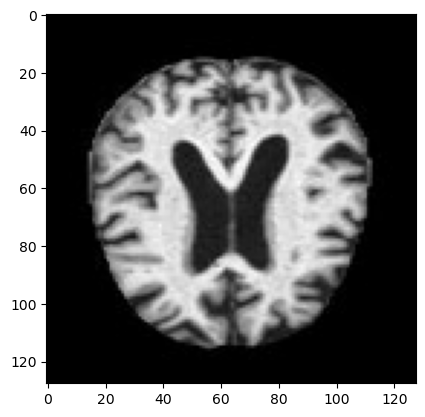

In [86]:
plt.imshow(mild[0])

In [90]:
mean = np.mean(mild)
std = np.std(mild)
mild_norm = (mild - mean )/ std

In [95]:
mean

66.6935692514692

In [94]:
std

80.11995638718804

In [97]:
mild_norm.min()

-0.8324214372904245

In [89]:
mean

66.6935692514692